# Proyecto - 2 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

datos = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = datos.load_data()

clase_imagenes = ['Playera', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Tenis', 'Bolso', 'Botas']

In [2]:
def aplicar_filtro_a_imagenes(imagenes, filtro):
    from scipy.signal import convolve2d
    imagenes_filtradas = []
    for img in imagenes:
        img_filtrada = convolve2d(img, filtro, mode='same', boundary='fill', fillvalue=0)
        imagenes_filtradas.append(img_filtrada)
    return np.array(imagenes_filtradas)

In [3]:
filtros = {
    "Sobel X": np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]]),
    
    "Sobel Y": np.array([[-1, -2, -1],
                         [ 0,  0,  0],
                         [ 1,  2,  1]]),
    
    "Sharpen": np.array([[ 0, -1,  0],
                         [-1,  5, -1],
                         [ 0, -1,  0]]),
    
    "Blur": (1/9) * np.ones((3, 3)),
    
    "Edge Detection (Laplaciano)": np.array([[ 0,  1,  0],
                                              [ 1, -4,  1],
                                              [ 0,  1,  0]]),
    
    "Emboss": np.array([[-2, -1,  0],
                        [-1,  1,  1],
                        [ 0,  1,  2]]),
    
    "Outline": np.array([[-1, -1, -1],
                         [-1,  8, -1],
                         [-1, -1, -1]]),
    
    "Box Filter 5x5": (1/25) * np.ones((5, 5))
}

__Preparamos los datos normalizandolos, aplicando un filtro y finalmente redimensionando las imagenes.__

In [4]:
X_train = X_train / 255
X_test = X_test / 255

img_fil = {}
for nombre, kernel in filtros.items():
    X_train_filtrado = aplicar_filtro_a_imagenes(X_train, kernel)
    X_test_filtrado = aplicar_filtro_a_imagenes(X_test, kernel)

    X_train_filtrado = np.expand_dims(X_train_filtrado, -1)
    X_test_filtrado = np.expand_dims(X_test_filtrado, -1)

    img_fil[nombre] = (X_train_filtrado, X_test_filtrado)

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

__Modelo de clasificacion multiple.__

In [5]:
from keras.models import Sequential
from keras import layers

model = Sequential([
    #layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    #layers.MaxPooling2D(pool_size=(2,2)),
    #layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    #layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(input_shape=(28,28)),                             
    layers.Dense(128, activation='relu'),
    #layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    X_train, y_train, 
    epochs=10,
    batch_size = 128,
    validation_split = 0.1
)

Epoch 1/10
422/422 [==============================] - 2s 2ms/step - loss: 0.5604 - accuracy: 0.8084 - val_loss: 0.4308 - val_accuracy: 0.8457
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 0.4066 - accuracy: 0.8579 - val_loss: 0.3982 - val_accuracy: 0.8563
Epoch 3/10
422/422 [==============================] - 1s 2ms/step - loss: 0.3665 - accuracy: 0.8705 - val_loss: 0.3943 - val_accuracy: 0.8570
Epoch 4/10
422/422 [==============================] - 1s 2ms/step - loss: 0.3413 - accuracy: 0.8777 - val_loss: 0.3417 - val_accuracy: 0.8733
Epoch 5/10
422/422 [==============================] - 1s 2ms/step - loss: 0.3178 - accuracy: 0.8850 - val_loss: 0.3450 - val_accuracy: 0.8768
Epoch 6/10
422/422 [==============================] - 1s 2ms/step - loss: 0.3005 - accuracy: 0.8914 - val_loss: 0.3385 - val_accuracy: 0.8795
Epoch 7/10
422/422 [==============================] - 1s 2ms/step - loss: 0.2925 - accuracy: 0.8948 - val_loss: 0.3434 - val_accuracy: 0.8755
Epoch 

In [8]:
loss, precision = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3459 - accuracy: 0.8755


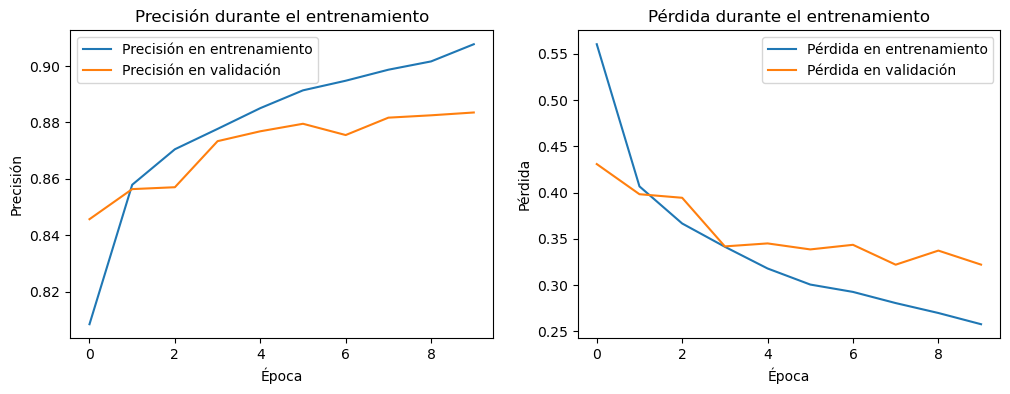

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [10]:
preds = model.predict(X_test)

313/313 [==============================] - 0s 742us/step


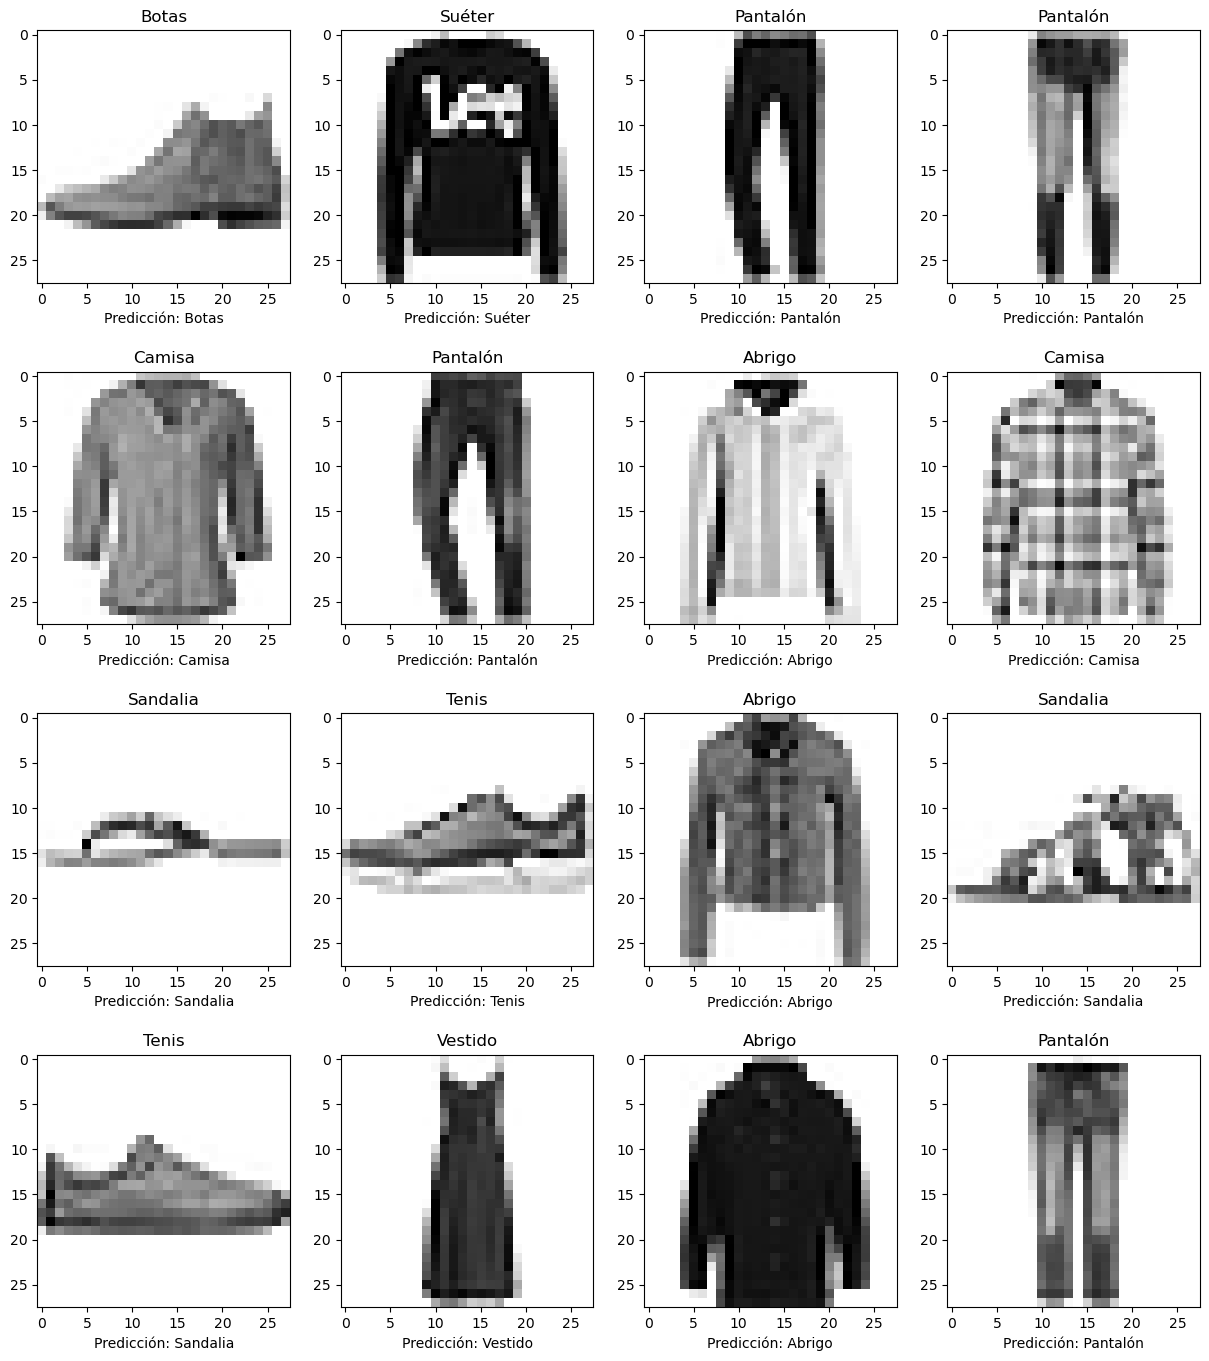

In [11]:
plt.figure(figsize=(15, 17))
plt.subplot(4, 4, 1)
plt.imshow(X_test[0], cmap=plt.cm.binary)
plt.xlabel('Predicción: ' + clase_imagenes[np.argmax(preds[0])])
plt.title(clase_imagenes[y_test[0]])

for i in range(15):
    plt.subplot(4, 4, i+2)
    plt.imshow(X_test[i+1], cmap=plt.cm.binary)
    plt.xlabel('Predicción: ' + clase_imagenes[np.argmax(preds[i+1])])
    plt.title(clase_imagenes[y_test[i+1]])
    
plt.show()

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


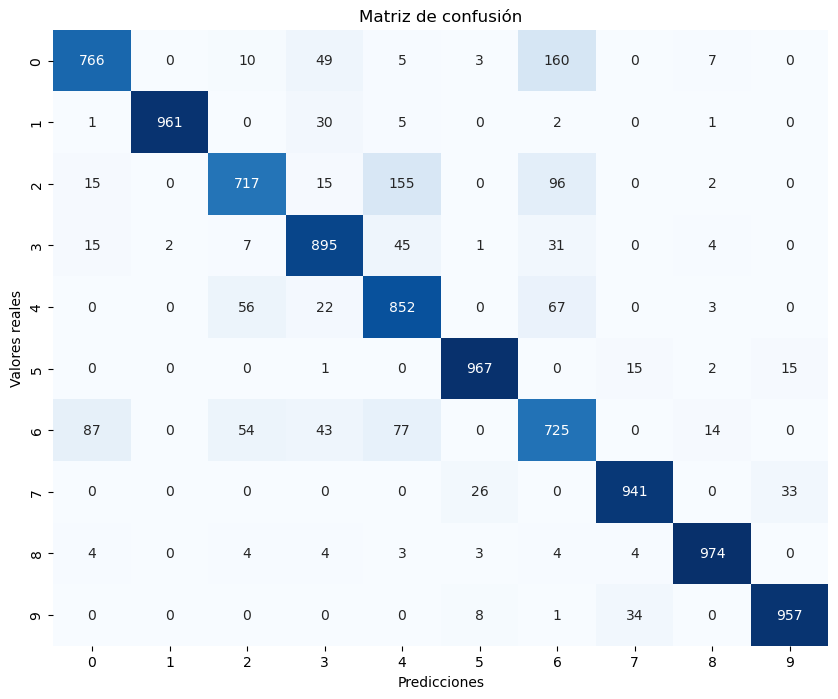

In [12]:
%pip install seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns

predicted_labels = np.argmax(preds, axis=1)
true_labels = y_test

cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

In [13]:
resultados = {}

model = Sequential([
    layers.Flatten(input_shape=(28,28)),                             
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
    
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

for nombre_filtro, (X_train_filtrado, X_test_filtrado) in img_fil.items():
    print(f"\nEntrenando modelo con filtro: {nombre_filtro}")

    history = model.fit(
        X_train_filtrado, y_train,
        epochs=10,
        batch_size=128,
        validation_split=0.1,
        verbose=0
    )

    test_loss, test_accuracy = model.evaluate(X_test_filtrado, y_test, verbose=0)

    resultados[nombre_filtro] = {
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss'],
        'accuracy': history.history['accuracy'],
        'val_accuracy': history.history['val_accuracy'],
        'test_loss': test_loss,
        'test_accuracy': test_accuracy
    }

    print(f"Precisión final en test para {nombre_filtro}: {test_accuracy:.4f}")



Entrenando modelo con filtro: Sobel X
Precisión final en test para Sobel X: 0.8837

Entrenando modelo con filtro: Sobel Y
Precisión final en test para Sobel Y: 0.8704

Entrenando modelo con filtro: Sharpen
Precisión final en test para Sharpen: 0.8729

Entrenando modelo con filtro: Blur
Precisión final en test para Blur: 0.8807

Entrenando modelo con filtro: Edge Detection (Laplaciano)
Precisión final en test para Edge Detection (Laplaciano): 0.8549

Entrenando modelo con filtro: Emboss
Precisión final en test para Emboss: 0.8705

Entrenando modelo con filtro: Outline
Precisión final en test para Outline: 0.8558

Entrenando modelo con filtro: Box Filter 5x5
Precisión final en test para Box Filter 5x5: 0.8616


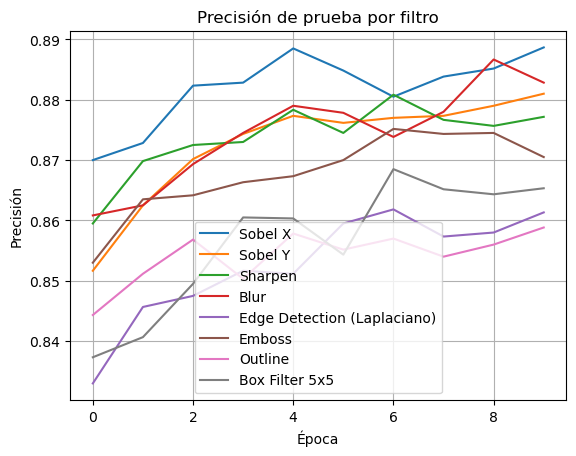

In [14]:
for nombre, metrics in resultados.items():
    plt.plot(metrics['val_accuracy'], label=nombre)

plt.title('Precisión de prueba por filtro')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()


## - JUSTIFICACION -

____

__Como se aprecia en el último gráfico, los modelos con los que obtenemos una mejor precision sobre el modelo sin los filtros son; Sobel X, Sobel Y y Gaussian Blur. Por lo que estos filtros son los elegidos, continuacion la justificacion:__

__Dado que las prendas se distinguen principalmente por sus contornos y costuras. Al aplicar un filtro Sobel, la imagen se convierte en un “mapa de bordes”: cada línea donde cambia bruscamente la tonalidad (los pliegues, las costuras, los bordes de las mangas o la suela de un zapato) aparece resaltada. Loq ue permite que el modelo aprecie directamente esas líneas y su orientación, lo que facilita diferenciar, por ejemplo, una camisa de un pantalón incluso si tienen texturas muy parecidas.__

__Por otro lado, el filtro Gaussian Blur actúa como un suavizador que elimina los pequeños detalles y el “ruido” de la superficie, desechando las variaciones sutiles de los tejidos, dejando solo las formas más grandes. Al reducir esa información secundaria, la red no se distrae con patrones de tela muy finos y enfoca su aprendizaje en la estructura general de cada prenda: la silueta de un bolso, la forma de una zapatilla o la caída de un suéter.__